<a href="https://colab.research.google.com/github/AAyyoouubb/TP_ML/blob/master/Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our dataset exist in google drive in a folder **project_machinglearning_S3**, therefore we  will open this folder as root directory

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

# change to default path of datasets
import os
os.chdir("/content/drive/MyDrive/project_machinglearning_S3")
! ls

Mounted at /content/drive/
classification_data7.csv  data8.csv	   Part2_data4.rar
data4.csv		  Part1_data8.rar



Cheching the existing the two part of the datasets:
* **data8.csv** For First Part
* **data4.csv** For Second Part

In [2]:
! ls data*

data4.csv  data8.csv


Importing libraries,
* **numpy** for matrix structures
* **pandas** for reading tables
* **matplotlib**  for visualization


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix as sm
import random
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

### **First Part:**



Pandas function `read_csv()` is used to read the csv file **data8.csv** and place it as a dataframe.

In [4]:
data =pd.read_csv("data8.csv")
data= data.sample(frac=1)

Split the dataset into inputs(x) and output(y). Use the method values to transform from a DataFrame object to an array object, which can efficiently managed by Numpy library.

In [5]:
y=data.y.values.reshape(-1,1)

x=data["x"].values.reshape(-1,1)


Add a bias column to the input vector. This is a column of ones so when we calibrate the parameters it will also multiply such bias.

In [6]:
X = np.concatenate((np.ones((len(x),1)),x),axis=1)

Spliting the data into **80%** training set and **20%** testing set.

In [7]:
trainingSplit = int(.8 * data.shape[0])

x_train = x[:trainingSplit]
x_test = x[trainingSplit:]

X_train = X[:trainingSplit]
X_test = X[trainingSplit:]

y_train = y[:trainingSplit] 
y_test = y[trainingSplit:]




**Q1.**


1.  There are one feature `x` and one label `y`.
2.  The size of training set is **184** and the size of testing set is 46.
3. No invalid value was found in the data.
4.  Bellow the describtion of the data: 

feature| mean | median | min | max
--- | --- | --- | --- | ---
x | 11.45|-0.1 |0|22.9
y | 25.94| 157.93|-0.43|50.44



In [8]:
# 1
print(*data.columns)

x y


In [9]:
# 2
print(x_train.shape,y_train.shape)
print(x_test.shape,X_test.shape)

(184, 1) (184, 1)
(46, 1) (46, 2)


In [10]:
# 3
pd.isna(data).any()


x    False
y    False
dtype: bool

In [11]:
# 4
print(data.describe())


                x           y
count  230.000000  230.000000
mean    11.450000   25.945763
std      6.653946   13.597779
min      0.000000   -0.431536
25%      5.725000   14.343240
50%     11.450000   26.286147
75%     17.175000   37.487885
max     22.900000   50.444631


**Q2.** Ploting the training set 

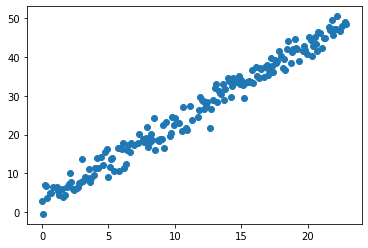

In [12]:
plt.scatter(x_train, y_train)

**Q3.** According to the ploting, the data is linear.


It is Supervised because the data labeled.

**Q4.**  (TODO)
The various metrics used to optimize error are :
* Gradient Descent
* Newton
* .

The various metrics used to evaluate the results of the prediction are :
* Mean Squared Error(MSE)
* Mean-Absolute-Error(MAE)
* .

**Q5.** 


Create a function `grad()` to compute the necessary gradients of the cost function. 


In [13]:
m = data.shape[0]

# calculate gradient
def grad(theta,X,y):
    dJ = 1/m*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)
    return dJ

Similarly, calculate the cost function `cost()`, also known as objective function, which can be expressed as the sum of the squared errors, as follows

In [14]:
def cost(theta,X,y):
    J = np.sum((X.dot(theta)-y)**2,axis=0)[0]/m
    return J



Armijo function for linear search the learning rate

In [15]:
def armijo(X,y,theta,grad=grad,cost=cost):
    eps = .001
    eta = 10
    alpha =10e-15    
    gradient = grad(theta,X,y)
    phiprzero = -gradient.T.dot(gradient)
    phizero = cost(theta,X,y)
    while  cost(theta-alpha*gradient,X,y)<= alpha * phiprzero * eps + phizero :
      alpha*=eta
    return alpha/eta


We are ready to implement the Gradient Descent algorithm
The parametres :
* `X` features;
* `y` labels;
* `learning_rate` learning rate for parametres update;
* `epochs` max iteration of gradient descent update;
* `TOL` is a tolerance, i.e a maximum difference between the values of the parameters between iterations so it can be stated that the values converged;
* `use_armijo` True to opt the armijo rule to calculate the learning rate otherwise the algorithm will use the fixed learning rate.


The steps of this algorithm consists of:
* Obtain the gradients of the cost function according the actual value of the parameters;
* Calculate the cost to keep track of it;
* Update the parameters;

In [16]:
def GD(X,y,learning_rate = 0.001,epochs=100,TOL=1e-7,use_armijo = False,verbose=False):
    theta = np.array([[0]]*X.shape[1])
    if verbose:print(theta)
    theta_history = [theta]
    J_history = [cost(theta,X,y)]
    
    thetanew = theta
    if verbose:print(f'epoch \t Cost(J,X,y) \t')
    for epoch in range(epochs):
        if epoch%100 == 0:
            if verbose:print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
        dJ = grad(theta,X,y)
        J = cost(theta,X,y)
        if use_armijo:learning_rate= armijo(X,y,theta)
        thetanew = theta - learning_rate*dJ
        theta_history.append(thetanew)
        J_history.append(J)
        
        if np.sum((thetanew - theta)**2) < TOL:
            if verbose:print('Convergence achieved.')
            break
        theta = thetanew
    if verbose:print(theta)
    return thetanew,theta_history,J_history

In [17]:
# theta,theta_history,J_history = GD(X,y,use_armijo=1)
# plt.scatter(data.x.values, y)
# Y_pred = X.dot(theta)
# plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color="red") # predicted
# plt.show()

Next, evaluate the Gradient Descent to determine the optimum set of parameters for 4 models (α = 0.001, 0.002, 0.003 and apply
Armijo’s learning rate);

In [18]:
models = []
models.append( GD(X_train,y_train,learning_rate = 0.001))
models.append( GD(X_train,y_train,learning_rate = 0.002))
models.append( GD(X_train,y_train,learning_rate = 0.003))
models.append( GD(X_train,y_train,use_armijo=1))

**Q6.** Drawing the fit line for the 4 models;

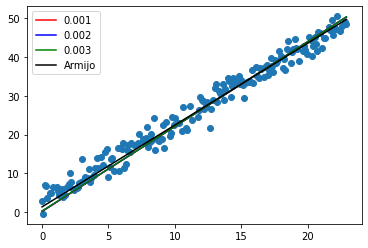

In [19]:
plt.scatter(x_train, y_train)

colors = ['red' , 'blue', "green","black"]
labels = ['0.001','0.002','0.003','Armijo']
for label,color,model in zip(labels,colors,models):
  theta = model[0]
  Y_pred = X_train.dot(theta)
  plt.plot([min(x_train), max(x_train)], [min(Y_pred), max(Y_pred)], color=color,label = label) # predicted
plt.legend()
plt.show()

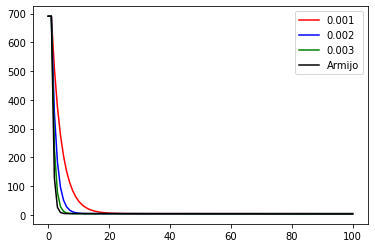

In [20]:
colors = ['red' , 'blue', "green","black"]
labels = ['0.001','0.002','0.003','Armijo']
for label,color,model in zip(labels,colors,models):
  J_history = model[2]
  plt.plot(J_history, color=color,label = label) # predicted
plt.legend()
plt.show()

**Q7.** Generalization error  

In [21]:
for model in models:
  theta =model[0]
  print(cost(theta,X_test,y_test))

1.1674175198719972
1.154010096323215
1.1411390690429803
0.9359103386541953


**Q14** Calculate the accuracy;

R²  score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression.

In [22]:
def accuracy(y_actual,y_pred):
  # sum of square of residuals
  ssr = np.sum((y_pred - y_actual)**2)
  #  total sum of squares
  sst = np.sum((y_actual - np.mean(y_actual))**2)
  # R2 score
  r2_score = 1 - (ssr/sst)
  return r2_score


In [23]:
for model in models:
  theta =model[0]
  print(accuracy(y,X.dot(theta)))

0.9684937948000597
0.9688613008659759
0.9692144795781603
0.9750104883760052


In [24]:
print(X.shape)

(230, 2)


In [25]:
def bootstrap(samples, X,y):
  X_train_sets = []
  y_train_sets = []

  ix = int(0.7*X.shape[0])
  for sample in range(samples):
    ix = np.random.randint(X.shape[0],size=X.shape[0])

    xx= X[ix,:] 
    yy= y[ix,:]

    X_train_sets.append(xx)
    y_train_sets.append(yy)

  return X_train_sets,y_train_sets

X_train_sets,y_train_sets = bootstrap(10,X_train,y_train)

In [26]:
def bias_var(X_train_sets,y_train_sets,X_test,y_test):
  samples = len(X_train_sets)
  predicts = np.zeros((samples,y_test.shape[0],1))
  for ix in range(samples):
    theta,theta_history,J_history = GD(X_train_sets[ix],y_train_sets[ix],use_armijo=1)
    predicts[ix,:] =X_test.dot(theta)

  mean_preds = np.mean(predicts)
  bias_per_point = (mean_preds-y_test)**2
  bias = np.mean(bias_per_point)
  var_per_point = np.mean((predicts-mean_preds)**2,axis=0)
  var = np.mean(var_per_point)
  return bias,var


In [27]:
bias,var = bias_var(X_train_sets,y_train_sets,X_test,y_test)
print(bias,var)

187.77135627793035 194.82952093368235


### **Second Part**

In [28]:
data = pd.read_csv("data4.csv")

data= data.sample(frac=1)

print(data.shape)

(240, 2)


Spliting to traing and testing

In [29]:
y=data.y.values.reshape(-1,1)
x=data["x"].values.reshape(-1,1)

print(x.shape,y.shape)
trainingSplit = int(.8 * data.shape[0])


x_train = x[:trainingSplit]
y_train = y[:trainingSplit] 
x_test = x[trainingSplit:]
y_test = y[trainingSplit:]

(240, 1) (240, 1)


**Q1.**

**q1.**

**1.1.** The data contain 2 features `x` and `y`.

In [30]:
print(*data.columns)

x y


**1.2.**  The size of training set is **192**, the size of testing size is **48**.









In [31]:
print(x_train.shape,y_train.shape)
print(x_test.shape,X_test.shape)


(192, 1) (192, 1)
(48, 1) (46, 2)


**1.3.** According to the ploting, The data is polynomial.

The data is Supervided : There is no missing data because the size of features equal the size of labels

**1.4.** bellow the describtion of our dataset :

 feature| mean | median | min | max
--- | --- | --- | --- | ---
x | -0.1|-0.1 |-24|23.8
y | 193.31| 157.39|-67.13|578.49

In [32]:
data.describe()

,x,y
count,240.000000,240.000000
mean,-0.100000,193.313566
std,13.885244,172.459213
min,-24.000000,-67.135789
25%,-12.050000,41.201270
50%,-0.100000,157.391379
75%,11.850000,324.378494
max,23.800000,578.496869


***q2.***

Using `matplotlib.scatter` to plot our **2D** dataset as scatters.

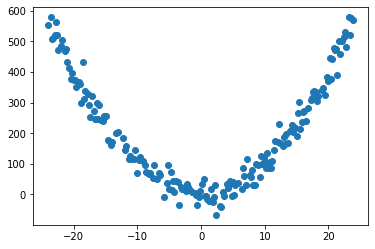

In [33]:
plt.scatter(x_train, y_train)


***q3.*** As showen in the figure above. the scatter of the training data is parabola.

The nature of the dataset is **supervised** because the data is labeled.

**Q2.** Create the tranformation `tf` which take the initial features and the degree and give the new features according to pylinomial transformation of given degree.

we will use the same gradient descent implimentated in part 1.

In [34]:
def tf(x,deg):
  X=np.ones((len(x),1))
  for i in range(1,deg+1):
    X = np.concatenate((X,x**i),axis=1)
  return X

Apply the tranformation for degree = 2

In [35]:
k=2
X_train =tf(x_train,deg=k)
X_test =tf(x_test,deg=k)
X =tf(x,deg=k)
print(X.shape)

(240, 3)


**Q4.** Fiting the model;

In [36]:

theta,theta_history,J_history = GD(X_train,y_train,use_armijo=1)
print("Error generalization =",cost(theta,X_test,X_test))

Error generalization = 11833.968483995282


**Q5.**

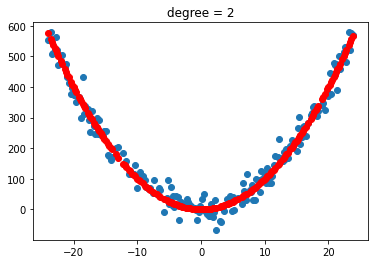

In [37]:
plt.scatter(x_train, y_train)
Y_pred = X_train.dot(theta)
plt.scatter(x_train, Y_pred, color="red") # predicted
plt.title("degree = "+str(k))
plt.show()

In [38]:
y_pred =X_test.dot(theta)
print("Accurcy = ",accuracy(X_test,y_pred))

Accurcy =  -1.4298685925226766


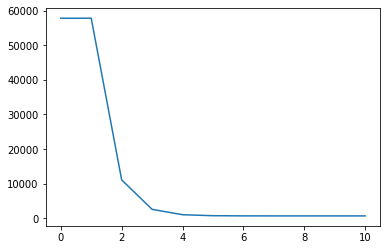

In [39]:
plt.plot(J_history)


Bias varience estimation for the 4 models:

In [40]:
for d in [1,2,4]:
  X_train = tf(x_train,deg = d)
  X_test = tf(x_test,deg = d)
  X_train_sets,y_train_sets = bootstrap(10,X_train,y_train)
  bias,var = bias_var(X_train_sets,y_train_sets,X_test,y_test)
  print("deg ",d,"bias",bias,"var",var)

deg  1 bias 27246.599116226145 var 117.08721269746654
deg  2 bias 27118.976206640396 var 26352.197872260134
deg  4 bias 29439.899905408558 var 34237.25866178206


### PART3

**Q1.** The logistic regression is not appropriate for our problem because the labels are not between 0 and 1.

**Q2.** To apply the logistic regression we need to normalise

In [41]:
ynorm = y.copy()
maxy = np.max(y)
miny = np.min(y)
ynorm = (y-miny)/(maxy - miny) 


Create the function for the logistic model

In [42]:
def sigmoid(z): return 1 / (1 + np.e**(-z))
m = data.shape[0]

# calculate gradient
def grad2(theta,X,y):
    y_hat = sigmoid(np.dot(X, theta))
    dJ = 1/m*np.sum((y_hat-y)*X,axis=0).reshape(-1,1)
    return dJ
def cost2(theta,X, y):         
    z = np.dot(X, theta)
    predict_1 = y * np.log(sigmoid(z))
    predict_0 = (1 - y) * np.log(1 - sigmoid(z))
    return -sum(predict_1 + predict_0) / len(X)

def LR(X,y,learning_rate = 0.001,epochs=1000,TOL=1e-7,use_armijo = False):
    theta = np.array([[0]]*X.shape[1])
    print(theta)
    theta_history = [theta]
    J_history = [cost2(theta,X,y)]
    
    thetanew = theta
    print(f'epoch \t Cost2(J,X,y) \t')
    for epoch in range(epochs):
        if epoch%100 == 0:
            print(f'{epoch:5d}\t{J_history[-1]}\t')
        dJ = grad2(theta,X,y)
        J = cost2(theta,X,y)
        if use_armijo:learning_rate= armijo(X,y,theta,grad2,cost2)
        thetanew = theta - learning_rate*dJ
        theta_history.append(thetanew)
        J_history.append(J)
        
        if np.sum((thetanew - theta)**2) < TOL:
            print('Convergence achieved.')
            break
        theta = thetanew

    return thetanew,theta_history,J_history

fit the model

In [43]:
theta,theta_history,J_history = LR(X,ynorm,use_armijo=1)


[[0]
 [0]
 [0]]
epoch 	 Cost2(J,X,y) 	
    0	[0.69314718]	
Convergence achieved.


Plot the diserid in blue, the predicted in red

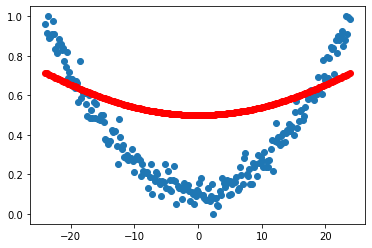

In [44]:
plt.scatter(x, ynorm)
Y_pred = sigmoid( X.dot(theta))
plt.scatter(x,Y_pred, color="red") 
plt.show()

The losse **history**

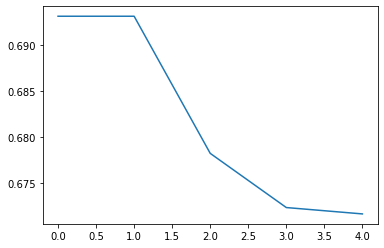

In [45]:
plt.plot(J_history)